In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weight-height.csv')

In [4]:
df.sample(5)

,Gender,Height,Weight
4920,Male,66.141613,170.898028
6654,Female,69.136144,165.681834
4877,Male,70.436347,196.175554
986,Male,69.972281,188.625911
5782,Female,63.440516,140.143427


C:\Users\Hanif ullah laptop\AppData\Local\Temp\ipykernel_11908\3615570960.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])


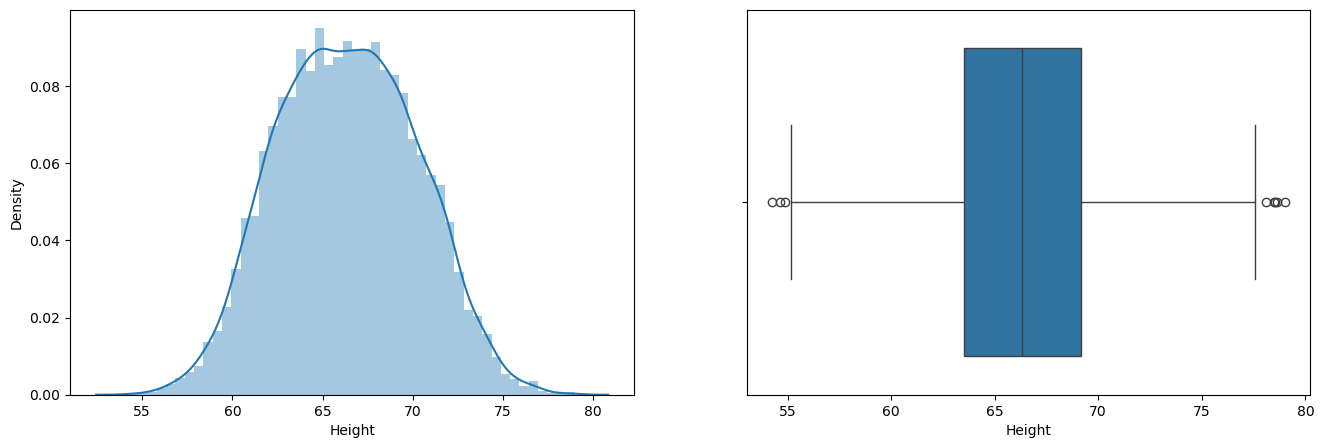

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["Height"])
plt.subplot(1,2,2)
sns.boxplot(x = df["Height"])
plt.show()

#  Trimming

In [11]:
HB=df["Height"].quantile(0.1)
LB=df["Height"].quantile(0.99)
print("highes boundry" , HB ,"Lowest boundry" , LB)

highes boundry 61.41270131336016 Lowest boundry 74.7857900583366


In [16]:
new_df = df[(df["Height"] < 74.7) & (df["Height"] >61)]
new_df


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height'>

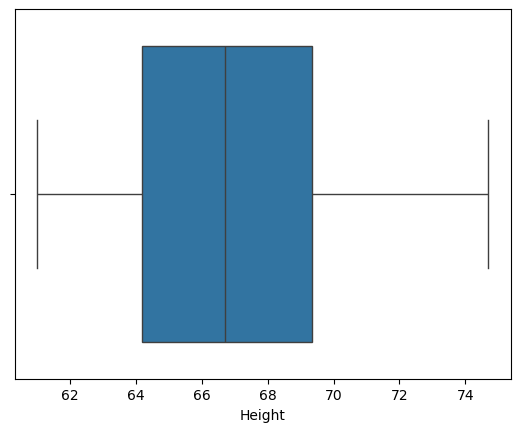

In [18]:
sns.boxplot(x = new_df["Height"])

# Capping ---------> Winsorization

In [19]:

df["Height"]= np.where(
    df["Height"]>HB,
     HB,
     np.where(
          df["Height"]<LB,
             LB,
          df["Height"]
     )
)


In [21]:
df['Height'].describe()

count    10000.000000
mean        62.750010
std          4.012127
min         61.412701
25%         61.412701
50%         61.412701
75%         61.412701
max         74.785790
Name: Height, dtype: float64